In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [442]:
df = pd.read_excel("hoursPM_2_5\export-67C711FE46A1-1h.xlsx")

In [443]:
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].mean())

In [444]:
df.isnull().sum()

Unnamed: 0     0
timestamp      0
timezone       0
humidity       0
pm_10          0
pm_2_5         0
temperature    0
dtype: int64

In [445]:
df.count()

Unnamed: 0     30623
timestamp      30623
timezone       30623
humidity       30623
pm_10          30623
pm_2_5         30623
temperature    30623
dtype: int64

In [446]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'timezone', 'humidity', 'pm_10', 'pm_2_5',
       'temperature'],
      dtype='object')

In [447]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["month"] = df["timestamp"].dt.month
df["dayofweek"] = df["timestamp"].dt.dayofweek
df["weekofyear"] = df["timestamp"].dt.dayofyear
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30623 entries, 0 to 30622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   30623 non-null  int64         
 1   timestamp    30623 non-null  datetime64[ns]
 2   timezone     30623 non-null  object        
 3   humidity     30623 non-null  float64       
 4   pm_10        30623 non-null  float64       
 5   pm_2_5       30623 non-null  float64       
 6   temperature  30623 non-null  float64       
 7   month        30623 non-null  int32         
 8   dayofweek    30623 non-null  int32         
 9   weekofyear   30623 non-null  int32         
 10  day          30623 non-null  int32         
 11  hour         30623 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(5), int64(1), object(1)
memory usage: 2.2+ MB


In [449]:
columns_to_drop = ["timezone","Unnamed: 0","pm_10","pm_2_5_sp","year"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df

,timestamp,humidity,pm_2_5,temperature,month,dayofweek,weekofyear,day,hour
0,2021-02-11 12:00:00,73.406334,6.988764,30.708124,2,3,42,11,12
1,2021-02-11 13:00:00,72.100732,7.284483,30.647504,2,3,42,11,13
2,2021-02-11 14:00:00,70.698645,8.534483,31.093218,2,3,42,11,14
3,2021-02-11 15:00:00,70.323760,8.663793,31.283685,2,3,42,11,15
4,2021-02-11 16:00:00,72.775261,9.282051,30.494213,2,3,42,11,16
...,...,...,...,...,...,...,...,...,...
30618,2025-02-04 12:00:00,70.040248,12.250000,30.389342,2,1,35,4,12
30619,2025-02-04 13:00:00,67.652070,9.816327,30.587789,2,1,35,4,13
30620,2025-02-04 14:00:00,65.669517,8.144144,31.358100,2,1,35,4,14
30621,2025-02-04 15:00:00,68.829932,8.490909,30.637799,2,1,35,4,15


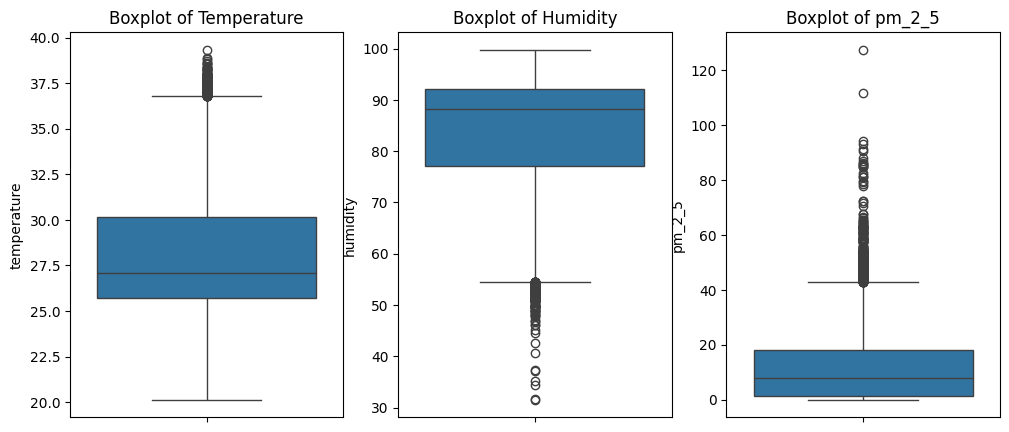

In [450]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of Temperature")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of Humidity")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of pm_2_5")

plt.show()

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30623 entries, 0 to 30622
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    30623 non-null  datetime64[ns]
 1   humidity     30623 non-null  float64       
 2   pm_2_5       30623 non-null  float64       
 3   temperature  30623 non-null  float64       
 4   month        30623 non-null  int32         
 5   dayofweek    30623 non-null  int32         
 6   weekofyear   30623 non-null  int32         
 7   day          30623 non-null  int32         
 8   hour         30623 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5)
memory usage: 1.5 MB


In [452]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

In [453]:
df['pm_2_5_lag_12day'] = df['pm_2_5'].shift(336)

In [454]:
df['PM2.5_MA3_prev_12day'] = df['pm_2_5'].shift(336).rolling(window=336).mean()

In [455]:
df['PM2.5_MAX24_prev_12day'] = df['pm_2_5'].shift(336).rolling(window=336).max()

In [456]:
df['PM2.5_MIN24_prev_12day'] = df['pm_2_5'].shift(336).rolling(window=336).min()

In [457]:
df = df.dropna()

In [458]:
df.dtypes

timestamp                 datetime64[ns]
humidity                         float64
pm_2_5                           float64
temperature                      float64
month                              int32
dayofweek                          int32
weekofyear                         int32
day                                int32
hour                               int32
pm_2_5_lag_12day                 float64
PM2.5_MA3_prev_12day             float64
PM2.5_MAX24_prev_12day           float64
PM2.5_MIN24_prev_12day           float64
dtype: object

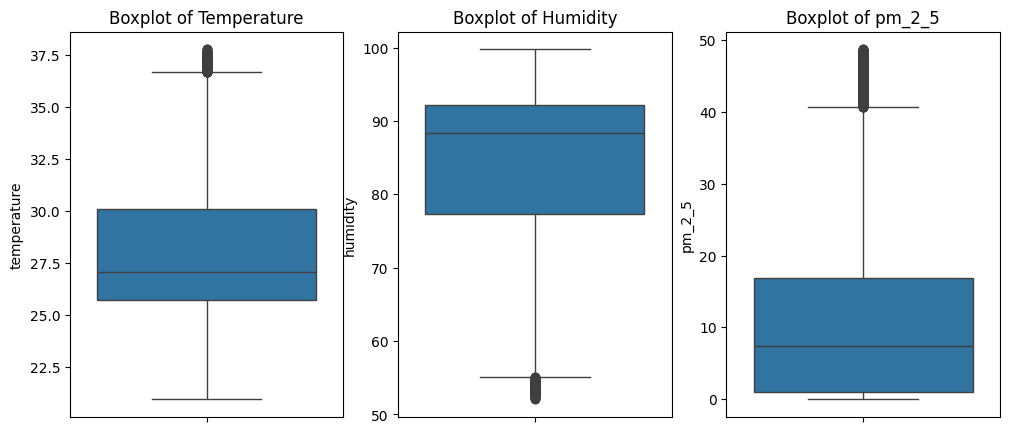

In [459]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of Temperature")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of Humidity")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of pm_2_5")

plt.show()

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29592 entries, 703 to 30622
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               29592 non-null  datetime64[ns]
 1   humidity                29592 non-null  float64       
 2   pm_2_5                  29592 non-null  float64       
 3   temperature             29592 non-null  float64       
 4   month                   29592 non-null  int32         
 5   dayofweek               29592 non-null  int32         
 6   weekofyear              29592 non-null  int32         
 7   day                     29592 non-null  int32         
 8   hour                    29592 non-null  int32         
 9   pm_2_5_lag_12day        29592 non-null  float64       
 10  PM2.5_MA3_prev_12day    29592 non-null  float64       
 11  PM2.5_MAX24_prev_12day  29592 non-null  float64       
 12  PM2.5_MIN24_prev_12day  29592 non-null  float64  

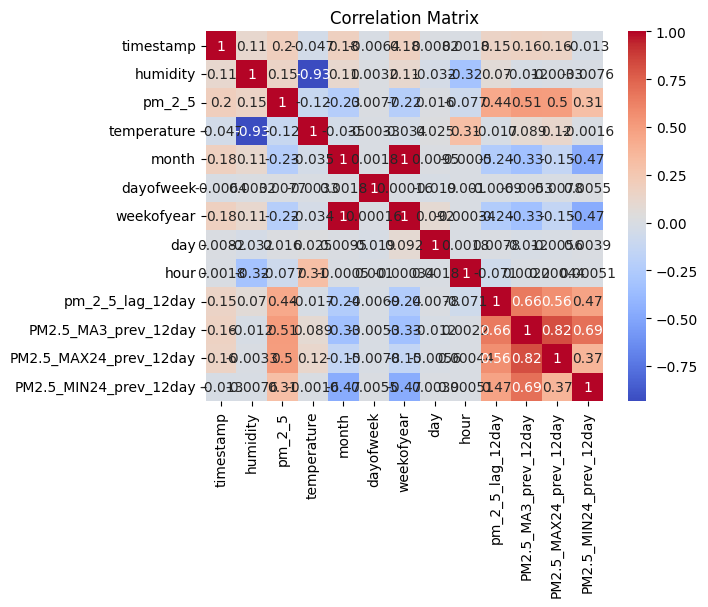

In [461]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [462]:
df.to_csv("67C.predict.h.csv")

In [463]:
columns_to_drop = ["timestamp"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [464]:
df.to_csv("67C.h.csv")